In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
import random
random.seed(1429)

In [3]:
df=pd.read_excel("Data_Train.xlsx")

In [4]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [5]:
df.tail()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
11089,ID_8067,"BTM Layout 1, Electronic City","Tibetan, Chinese, Continental, Momos",₹250,₹50,4.2,326,189,30 minutes
11090,ID_4620,"Sector 14, Noida",Fast Food,₹100,₹50,3.6,36,16,30 minutes
11091,ID_3392,Majestic,"South Indian, Chinese, North Indian",₹100,₹50,3.5,45,18,30 minutes
11092,ID_4115,"Sector 3, Marathalli",North Indian,₹100,₹50,3.1,24,9,30 minutes
11093,ID_4417,"Sector 63A,Gurgaon",North Indian,₹100,₹50,NEW,-,-,30 minutes


In [6]:
df.drop(labels=['Restaurant'], axis=1, inplace=True)

In [ ]:
df.Location=df.Location.str.replace('\d+',"")

In [ ]:
import spacy

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
def punc_remove(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        if not word.is_punct | word.is_space:
            sent.append(word.text)
    return " ".join(sent)


In [ ]:
df.Location=df.apply(lambda a : punc_remove(a['Location']), axis=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text

In [ ]:
stopw=list(text.ENGLISH_STOP_WORDS)

In [ ]:
cvec=CountVectorizer(stop_words=stopw)

In [ ]:
cvec.fit_transform(df.Location)

In [ ]:
print(cvec.vocabulary_)

In [ ]:
tfvec=TfidfVectorizer(stop_words=stopw, ngram_range=(2,2))

In [ ]:
tfvec.fit_transform(df.Location)

In [ ]:
print(tfvec.vocabulary_)

In [ ]:
fow=tfvec.vocabulary_

In [ ]:
fow=pd.Series(fow)

In [ ]:
fow=pd.DataFrame(fow)

In [ ]:
fow.reset_index(inplace=True)

In [ ]:
fow.columns=['Word','Freq']

In [ ]:
fow=fow.sort_values(by='Freq',ascending=False)

In [ ]:
plt.rcParams['figure.figsize']=30,6
sns.barplot(x=fow.Word, y=fow.Freq)
plt.xticks(rotation=90)

In [7]:
df.drop(labels=['Cuisines','Location'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 6 columns):
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(6)
memory usage: 520.2+ KB


In [9]:
df.columns

Index(['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews',
       'Delivery_Time'],
      dtype='object')

In [10]:
df.Average_Cost=df.Average_Cost.str.replace('₹','')

In [11]:
df.Minimum_Order=df.Minimum_Order.str.replace('₹','')

In [12]:
df.Delivery_Time=df.Delivery_Time.str.replace('minutes','')

In [13]:
df.Minimum_Order=df.Minimum_Order.astype('float')

In [14]:
df.Delivery_Time=df.Delivery_Time.astype('float')

In [15]:
df.Average_Cost=df.Average_Cost.str.replace(',','')

In [16]:
df.Average_Cost=df.Average_Cost.str.replace('for','0')

In [17]:
df.Average_Cost=df.Average_Cost.astype('float')

In [18]:
df.Average_Cost=df.Average_Cost.astype('float')

In [19]:
df.Rating=df.Rating.str.replace('\D+','0')

In [20]:
df.Rating=df.Rating.astype('float')

In [21]:
df.Reviews=df.Reviews.str.replace('\D+','0')

In [22]:
df.Reviews=df.Reviews.astype('float')

In [23]:
df.Votes=df.Votes.str.replace('\D+','0')

In [24]:
df.Votes=df.Votes.astype('float')

In [25]:
df.describe()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,11094.000000,11094.000000,11094.000000,11094.000000,11094.000000,11094.000000
mean,202.690644,53.344511,263.226519,198.827384,97.562917,37.056066
std,129.847522,18.551245,129.532419,509.520666,289.972698,12.447496
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,100.000000,50.000000,300.000000,7.000000,2.000000,30.000000
50%,200.000000,50.000000,305.000000,37.000000,14.000000,30.000000
75%,200.000000,50.000000,308.000000,157.000000,63.000000,45.000000
max,2050.000000,500.000000,409.000000,9054.000000,6504.000000,120.000000


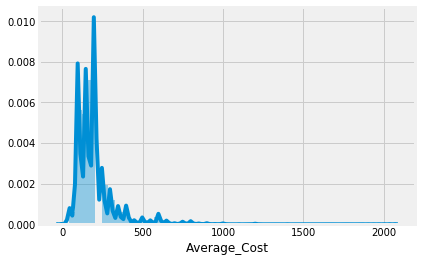

In [26]:
sns.distplot(df.Average_Cost)

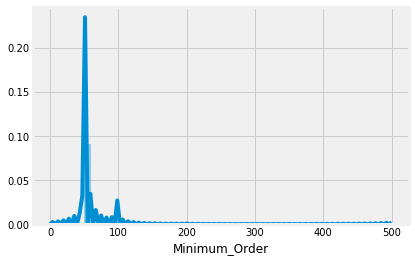

In [27]:
sns.distplot(df.Minimum_Order)

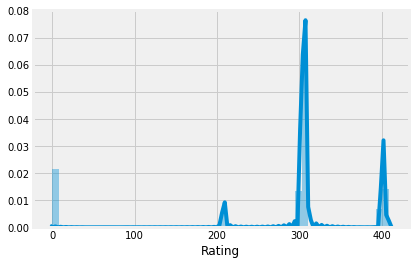

In [28]:
sns.distplot(df.Rating)

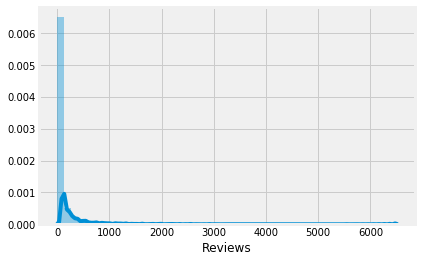

In [29]:
sns.distplot(df.Reviews)

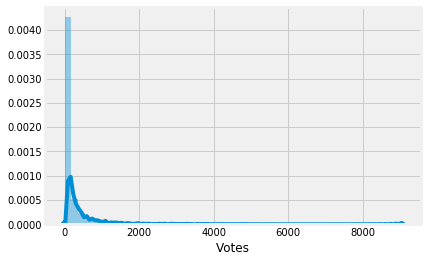

In [30]:
sns.distplot(df.Votes)

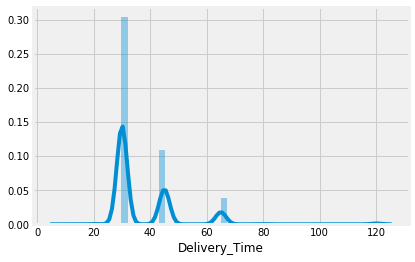

In [31]:
sns.distplot(df.Delivery_Time)

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [33]:
import keras

Using TensorFlow backend.


In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
from keras.wrappers.scikit_learn import KerasRegressor

In [37]:
regressor=Sequential()

In [38]:
regressor.add(Dense(units=3, activation='relu', kernel_initializer='normal',input_dim=5))

In [39]:
regressor.add(Dense(units=3, activation='relu', kernel_initializer='normal'))

In [40]:
regressor.add(Dense(units=1, activation='linear', kernel_initializer='normal'))

In [41]:
regressor.compile(optimizer='Adamax', loss='mse', metrics=['mse','mae'])

In [42]:
X=df.loc[:,['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews']]
y=df.loc[:,'Delivery_Time']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
skl_x=StandardScaler()
skl_new=StandardScaler()

In [45]:
X_train_skl=skl_x.fit_transform(X_train)
X_test_skl=skl_x.transform(X_test)

In [46]:
X_train_skl=pd.DataFrame(X_train_skl, columns=X.columns)
X_test_skl=pd.DataFrame(X_test_skl, columns=X.columns)

In [47]:
regressor.fit(X_train_skl, y_train, epochs=100, batch_size=32)

Epoch 1/100
7765/7765 [==============================] - 1s 106us/step - loss: 1493.9994 - mse: 1493.9994 - mae: 36.6358
Epoch 2/100
7765/7765 [==============================] - 0s 38us/step - loss: 1309.2562 - mse: 1309.2563 - mae: 34.0851
Epoch 3/100
7765/7765 [==============================] - 0s 39us/step - loss: 873.2621 - mse: 873.2619 - mae: 26.8315
Epoch 4/100
7765/7765 [==============================] - 0s 40us/step - loss: 411.1602 - mse: 411.1602 - mae: 15.9282
Epoch 5/100
7765/7765 [==============================] - 0s 51us/step - loss: 273.3662 - mse: 273.3662 - mae: 11.8212 0s - loss: 275.8461 - mse: 275.8461 - mae: 11.85
Epoch 6/100
7765/7765 [==============================] - 0s 43us/step - loss: 242.2224 - mse: 242.2222 - mae: 11.7457 0s - loss: 248.2478 - mse: 248.2478 - 
Epoch 7/100
7765/7765 [==============================] - 0s 38us/step - loss: 224.7985 - mse: 224.7985 - mae: 11.5929 0s - loss: 245.7867 - mse: 245.7868 - mae:
Epoch 8/100
7765/7765 [===============

Epoch 65/100
7765/7765 [==============================] - 0s 34us/step - loss: 133.0349 - mse: 133.0349 - mae: 8.0984
Epoch 66/100
7765/7765 [==============================] - 0s 31us/step - loss: 133.0307 - mse: 133.0307 - mae: 8.1219
Epoch 67/100
7765/7765 [==============================] - 0s 32us/step - loss: 132.9791 - mse: 132.9791 - mae: 8.0976: 0s - loss: 131.5113 - mse: 131.5114 - mae: 8.064
Epoch 68/100
7765/7765 [==============================] - ETA: 0s - loss: 132.0325 - mse: 132.0325 - mae: 8.119 - 0s 32us/step - loss: 132.9999 - mse: 132.9999 - mae: 8.1173
Epoch 69/100
7765/7765 [==============================] - 0s 32us/step - loss: 132.9061 - mse: 132.9061 - mae: 8.0388: 0s - loss: 126.1577 - mse: 126.1577 - mae: 7.76
Epoch 70/100
7765/7765 [==============================] - 0s 32us/step - loss: 132.9818 - mse: 132.9818 - mae: 8.1448
Epoch 71/100
7765/7765 [==============================] - 0s 32us/step - loss: 132.9973 - mse: 132.9973 - mae: 8.0693
Epoch 72/100
7765/7

In [48]:
predicted_time=regressor.predict(X_test_skl)

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [50]:
print(f'Mean Squared Error is {np.sqrt(mean_squared_error(y_test, predicted_time)) :.2f}')
print(f'Mean Abs Error is {mean_absolute_error(y_test, predicted_time) :.2f}')

Mean Squared Error is 11.76
Mean Abs Error is 8.18


In [51]:
def build_reg():
    regressor=Sequential()
    regressor.add(Dense(units=3, activation='relu', kernel_initializer='normal',input_dim=5))
    regressor.add(Dense(units=3, activation='relu', kernel_initializer='normal'))
    regressor.add(Dense(units=1, activation='linear', kernel_initializer='normal'))
    regressor.compile(optimizer='Adamax', loss='mse', metrics=['mse','mae'])
    return regressor

In [52]:
ann_reg=KerasRegressor(build_fn=build_reg, epochs=100, batch_size=32)

In [53]:
msq=cross_val_score(estimator=ann_reg, X=X_train_skl, y=y_train,cv=10, verbose=1, n_jobs=4, scoring='neg_mean_squared_error')

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.9min finished


In [54]:
print(f'Train CV RMSE {np.sqrt(np.mean(np.abs(msq))): .2f}')

Train CV RMSE  11.69


In [55]:
def build_reg(optimizer):
    regressor=Sequential()
    regressor.add(Dense(units=3, activation='relu', kernel_initializer='normal',input_dim=5))
    regressor.add(Dropout(rate=0.6))
    regressor.add(Dense(units=3, activation='relu', kernel_initializer='normal'))
    regressor.add(Dropout(rate=0.6))
    regressor.add(Dense(units=1, activation='linear', kernel_initializer='normal'))
    regressor.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae'])
    return regressor

In [56]:
ann_reg=KerasRegressor(build_fn=build_reg)

In [57]:
param={'epochs':[100,500], 'batch_size':[32,64], 'optimizer':['Adamax','rmsprop']}

In [58]:
gd_cv_ann=GridSearchCV(estimator=ann_reg, param_grid=param, n_jobs=4, cv=10,
                       scoring='neg_mean_squared_error', return_train_score=True)

In [59]:
gd_cv_ann.fit(X_train_skl, y_train)

C:\Users\bishw\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/500
7765/7765 [==============================] - 0s 43us/step - loss: 1510.6802 - mse: 1510.6802 - mae: 36.8554
Epoch 2/500
7765/7765 [==============================] - 0s 27us/step - loss: 1466.7920 - mse: 1466.7920 - mae: 36.2373 0s - loss: 1465.6500 - mse: 1465.6498 - mae: 3
Epoch 3/500
7765/7765 [==============================] - 0s 27us/step - loss: 1370.2612 - mse: 1370.2614 - mae: 34.7405
Epoch 4/500
7765/7765 [==============================] - 0s 27us/step - loss: 1205.6903 - mse: 1205.6904 - mae: 31.7202
Epoch 5/500
7765/7765 [==============================] - 0s 27us/step - loss: 1054.2422 - mse: 1054.2421 - mae: 28.4944
Epoch 6/500
7765/7765 [==============================] - 0s 27us/step - loss: 970.3369 - mse: 970.3369 - mae: 26.8512
Epoch 7/500
7765/7765 [==============================] - 0s 26us/step - loss: 918.6427 - mse: 918.6426 - mae: 25.8269
Epoch 8/500
7765/7765 [==============================] - 0s 27us/step - loss: 889.5863 - mse: 889.5864 - mae: 25.2246

7765/7765 [==============================] - 0s 27us/step - loss: 169.6509 - mse: 169.6509 - mae: 8.2485
Epoch 135/500
7765/7765 [==============================] - 0s 27us/step - loss: 165.9718 - mse: 165.9718 - mae: 8.2670
Epoch 136/500
7765/7765 [==============================] - 0s 27us/step - loss: 164.8164 - mse: 164.8163 - mae: 8.1430
Epoch 137/500
7765/7765 [==============================] - 0s 27us/step - loss: 165.3677 - mse: 165.3678 - mae: 8.3035
Epoch 138/500
7765/7765 [==============================] - 0s 27us/step - loss: 163.0588 - mse: 163.0589 - mae: 8.3451
Epoch 139/500
7765/7765 [==============================] - 0s 26us/step - loss: 161.8102 - mse: 161.8102 - mae: 8.2750
Epoch 140/500
7765/7765 [==============================] - 0s 26us/step - loss: 160.3504 - mse: 160.3503 - mae: 8.3562
Epoch 141/500
7765/7765 [==============================] - 0s 27us/step - loss: 161.1346 - mse: 161.1346 - mae: 8.3736
Epoch 142/500
7765/7765 [==============================] - 0s 

Epoch 271/500
7765/7765 [==============================] - 0s 27us/step - loss: 147.6087 - mse: 147.6086 - mae: 9.11040s - loss: 149.1637 - mse: 149.1637 - mae: 9.
Epoch 272/500
7765/7765 [==============================] - 0s 27us/step - loss: 146.4593 - mse: 146.4593 - mae: 9.1025
Epoch 273/500
7765/7765 [==============================] - 0s 26us/step - loss: 146.5283 - mse: 146.5283 - mae: 9.0883
Epoch 274/500
7765/7765 [==============================] - 0s 27us/step - loss: 146.3284 - mse: 146.3284 - mae: 9.0912
Epoch 275/500
7765/7765 [==============================] - 0s 27us/step - loss: 149.8538 - mse: 149.8538 - mae: 9.0960
Epoch 276/500
7765/7765 [==============================] - 0s 27us/step - loss: 146.5674 - mse: 146.5674 - mae: 9.0648
Epoch 277/500
7765/7765 [==============================] - 0s 27us/step - loss: 145.8891 - mse: 145.8891 - mae: 9.0915
Epoch 278/500
7765/7765 [==============================] - 0s 27us/step - loss: 145.4151 - mse: 145.4151 - mae: 9.0516
Epo

7765/7765 [==============================] - 0s 27us/step - loss: 144.3924 - mse: 144.3924 - mae: 9.0345
Epoch 405/500
7765/7765 [==============================] - 0s 29us/step - loss: 148.0200 - mse: 148.0200 - mae: 9.0828
Epoch 406/500
7765/7765 [==============================] - 0s 29us/step - loss: 146.6411 - mse: 146.6412 - mae: 9.0851
Epoch 407/500
7765/7765 [==============================] - 0s 28us/step - loss: 147.1816 - mse: 147.1816 - mae: 9.0975
Epoch 408/500
7765/7765 [==============================] - 0s 28us/step - loss: 147.0370 - mse: 147.0370 - mae: 9.0780
Epoch 409/500
7765/7765 [==============================] - 0s 27us/step - loss: 145.7729 - mse: 145.7729 - mae: 9.0536
Epoch 410/500
7765/7765 [==============================] - 0s 28us/step - loss: 147.4073 - mse: 147.4073 - mae: 9.0774
Epoch 411/500
7765/7765 [==============================] - 0s 27us/step - loss: 145.7365 - mse: 145.7365 - mae: 9.0942
Epoch 412/500
7765/7765 [==============================] - 0s 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000002A18B365608>,
             iid='warn', n_jobs=4,
             param_grid={'batch_size': [32, 64], 'epochs': [100, 500],
                         'optimizer': ['Adamax', 'rmsprop']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [60]:
np.sqrt(np.abs(gd_cv_ann.best_score_))

11.918801689860423

In [61]:
pred=gd_cv_ann.predict(X_test_skl)

In [62]:
print(f'Mean Squared Error is {np.sqrt(mean_squared_error(y_test, pred)) :.2f}')
print(f'Mean Abs Error is {mean_absolute_error(y_test, pred) :.2f}')

Mean Squared Error is 12.21
Mean Abs Error is 9.03


Preding using new data

In [63]:
test=pd.read_excel("Data_Test.xlsx")

In [64]:
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [65]:
test.drop(labels=['Restaurant'], axis=1, inplace=True)

In [66]:
test.drop(labels=['Cuisines','Location'], axis=1, inplace=True)

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 5 columns):
Average_Cost     2774 non-null object
Minimum_Order    2774 non-null object
Rating           2774 non-null object
Votes            2774 non-null object
Reviews          2774 non-null object
dtypes: object(5)
memory usage: 108.5+ KB


In [68]:
test.columns

Index(['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews'], dtype='object')

In [69]:
test.Average_Cost=test.Average_Cost.str.replace('₹','')

In [70]:
test.Minimum_Order=test.Minimum_Order.str.replace('₹','')

In [71]:
test.Minimum_Order=test.Minimum_Order.astype('float')

In [72]:
test.Average_Cost=test.Average_Cost.str.replace(',','')

In [73]:
test.Average_Cost=test.Average_Cost.str.replace('for','0')

In [74]:
test.Average_Cost=test.Average_Cost.astype('float')

In [75]:
test.Average_Cost=test.Average_Cost.astype('float')

In [76]:
test.Rating=test.Rating.str.replace('\D+','0')

In [77]:
test.Rating=test.Rating.astype('float')

In [78]:
test.Reviews=test.Reviews.str.replace('\D+','0')

In [79]:
test.Reviews=test.Reviews.astype('float')

In [80]:
test.Votes=test.Votes.str.replace('\D+','0')

In [81]:
test.Votes=test.Votes.astype('float')

In [82]:
test.describe()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews
count,2774.000000,2774.000000,2774.000000,2774.000000,2774.000000
mean,195.385725,53.300288,259.741528,182.589762,87.594448
std,114.509785,18.619802,130.142899,480.784022,263.403449
min,50.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,50.000000,300.000000,6.000000,1.000000
50%,200.000000,50.000000,305.000000,35.500000,13.000000
75%,200.000000,50.000000,308.000000,148.750000,60.000000
max,1200.000000,500.000000,408.000000,7811.000000,3863.000000


In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 5 columns):
Average_Cost     2774 non-null float64
Minimum_Order    2774 non-null float64
Rating           2774 non-null float64
Votes            2774 non-null float64
Reviews          2774 non-null float64
dtypes: float64(5)
memory usage: 108.5 KB


In [103]:
test_skl=skl_x.fit_transform(test)
test_skl=pd.DataFrame(test_skl, columns=test.columns)

In [104]:
test_skl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 5 columns):
Average_Cost     2774 non-null float64
Minimum_Order    2774 non-null float64
Rating           2774 non-null float64
Votes            2774 non-null float64
Reviews          2774 non-null float64
dtypes: float64(5)
memory usage: 108.5 KB


In [109]:
new=gd_cv_ann.predict(test_skl)

In [113]:
import csv
outfile = open('output.csv','w+')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], np.round(new,0)))
outfile.close()